<a href="https://colab.research.google.com/github/bernaldiaz/bernaldiaz/blob/main/numefluid1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 A script to set up and solve the 1D diffusion equation for conduction
#	in a bar
#
#	[Chapter 2]
#
#	Author: Dr. Aidan Wimshurst (FluidMechanics101)
#
#	- Email: FluidMechanics101@gmail.com
#	- Web  : https://www.fluidmechanics101.com
#	- YouTube: Fluid Mechanics 101
#
#	Version 1.0.0 11/05/2019

In [30]:
import numpy
import matplotlib.pyplot as plt

In [31]:
# Thermal Conductivity of the bar (W/mK)
cond = 100

# Cross-sectional Area of the bar (m2)
area = 0.1

# Length of the bar (m)
barLength = 5

# Number of cells in the mesh
nCells = 5

# Temperature at the left hand side of the bar (deg C)
tempLeft = 100

# Temperature at the left hand side of the bar (deg C)
tempRight = 200

In [32]:
# Heat source per unit volume (W/m3)
heatSourcePerVol = 1000

# Plot the data?
plotOutput = 'true'

# Print the set up data? (table of coefficients and matrices)
printSetup = 'true'

# Print the solution output (the temperature vector)
printSolution = 'true'


In [33]:
# ============================================================================
# Code Begins Here
# ============================================================================


In [34]:
print ('================================================')
print ('')
print ('   solve1DDiffusionEquation.py')
print ('')
print (' - Fluid Mechanics 101')
print (' - Author: Dr. Aidan Wimshurst')
print (' - Contact: FluidMechanics101@gmail.com')
print ('')
print (' [Exercise 1: Chapter 1]')
print ('================================================')



   solve1DDiffusionEquation.py

 - Fluid Mechanics 101
 - Author: Dr. Aidan Wimshurst
 - Contact: FluidMechanics101@gmail.com

 [Exercise 1: Chapter 1]


In [35]:
###############################################################################
#
# 	Create the mesh of cells
#
###############################################################################

print ('------------------------------------------------')
print (' Creating Mesh')
print ('------------------------------------------------')


------------------------------------------------
 Creating Mesh
------------------------------------------------


In [36]:
# Start by calculating the coordinates of the cell faces
xFaces = numpy.linspace(0, barLength, nCells+1)

# Calculate the coordinates of the cell centroids
xCentroids = 0.5*(xFaces[1:] + xFaces[0:-1])

In [37]:
# Calculate the length of each cell
cellLength = xFaces[1:] - xFaces[0:-1]

# Calculate the distance between cell centroids
dCentroids = xCentroids[1:] - xCentroids[0:-1]

In [38]:
# For the boundary cell on the left, the distance is double the distance
# from the cell centroid to the boundary face
dLeft = 2*(xCentroids[0] - xFaces[0])

# For the boundary cell on the right, the distance is double the distance from
# the cell centroid to the boundary cell face
dRight = 2*(xFaces[-1] - xCentroids[-1])

In [39]:
# Append these to the vector of distances
dCentroids = numpy.hstack([dLeft, dCentroids, dRight])

# Compute the cell volume
cellVolumes = cellLength*area

In [40]:
###############################################################################
#
# 	Calculate the Matrix Coefficients
#
###############################################################################


In [41]:
print ('------------------------------------------------')
print (' Calculating Matrix Coefficients')
print ('------------------------------------------------')

# Diffusive flux per unit area
DA = area*numpy.divide(cond, dCentroids)

# Calculate the source term Sp
Sp = numpy.zeros(nCells)

# Assign sources to the left and right hand boundaries
Sp[0] = -2.0*numpy.copy(DA[0])
Sp[-1] = -2.0*numpy.copy(DA[-1])


------------------------------------------------
 Calculating Matrix Coefficients
------------------------------------------------


In [42]:
# Calculate the source term Su
Su = heatSourcePerVol*cellVolumes

# Assign sources to the left and right hand boundaries
Su[0] = Su[0] + 2.0*numpy.copy(DA[0])*tempLeft
Su[-1] = Su[-1] + 2.0*numpy.copy(DA[-1])*tempRight

# Left Coefficient (aL)
aL = numpy.copy(DA[0:-1])

# Right Coefficient (aR)
aR = numpy.copy(DA[1:])

In [43]:
# Set the first element of aL to zero. It is a boundary face
aL[0] = 0

# Set the last element of aR to zero. It is a boundary face
aR[-1] = 0

# Create the central coefficients
aP = numpy.copy(aL) + numpy.copy(aR) - numpy.copy(Sp)


In [44]:
###############################################################################
#
# 	Create the matrices
#
###############################################################################

print ('------------------------------------------------')
print (' Assembling Matrices')
print ('------------------------------------------------')

# Start by creating an empty A matrix and an empty B matrix
Amatrix = numpy.zeros([nCells, nCells])
BVector = numpy.zeros(nCells)


------------------------------------------------
 Assembling Matrices
------------------------------------------------


In [45]:
# Populate the matrix one row at a time (i.e one cell at a time)

#
# NOTE: this method is deliberately inefficient for this problem
#		but it is useful for learning purposes. We could populate the
#		diagonals and the off-diagonals directly.


In [46]:
for i in range(nCells):

	# Do the A matrix Coefficients

	# Left boundary Cell
	if (i == 0):

		Amatrix[i,i] = aP[i]
		Amatrix[i,i+1] = -1.0*aR[i]
    # Right Boundary Cell
	elif(i == nCells-1):

		Amatrix[i, i-1] = -1.0*aL[i]
		Amatrix[i,i] = aP[i]

	# Interior Cells
	else:

		Amatrix[i, i-1] = -1.0*aL[i]
		Amatrix[i,i] = aP[i]
		Amatrix[i,i+1] = -1.0*aR[i]

	# Do the B matrix coefficients
	BVector[i] = Su[i]


In [47]:
###############################################################################
#
# 	Print the setup
#
###############################################################################

if (printSetup == 'true'):

	print ('------------------------------------------------')
	print (' Summary: Set Up')
	print ('------------------------------------------------')
	print ('aL:')
	print (aL)
	print ('aR:')
	print (aR)
	print ('aP:')
	print (aP)
	print ('Sp:')
	print (Sp)
	print ('Su:')
	print (Su)
	print ('A matrix:')
	print (Amatrix)
	print ('B vector')
	print (BVector)

###############################################################################

------------------------------------------------
 Summary: Set Up
------------------------------------------------
aL:
[ 0. 10. 10. 10. 10.]
aR:
[10. 10. 10. 10.  0.]
aP:
[30. 20. 20. 20. 30.]
Sp:
[-20.   0.   0.   0. -20.]
Su:
[2100.  100.  100.  100. 4100.]
A matrix:
[[ 30. -10.   0.   0.   0.]
 [-10.  20. -10.   0.   0.]
 [  0. -10.  20. -10.   0.]
 [  0.   0. -10.  20. -10.]
 [  0.   0.   0. -10.  30.]]
B vector
[2100.  100.  100.  100. 4100.]


In [48]:
###############################################################################
#
# 	Solve the matrices
#
###############################################################################

print ('------------------------------------------------')
print (' Solving ...')
print ('------------------------------------------------')

# Use the built-in python solution module
Tvector = numpy.linalg.solve(Amatrix, BVector)

print ('------------------------------------------------')
print (' Equations Solved')
print ('------------------------------------------------')

------------------------------------------------
 Solving ...
------------------------------------------------
------------------------------------------------
 Equations Solved
------------------------------------------------


In [49]:
###############################################################################
#
# 	Print the Results
#
###############################################################################

if (printSolution == 'true'):

	print ('------------------------------------------------')
	print (' Solution: Temperature Vector')
	print ('------------------------------------------------')
	print (Tvector)


------------------------------------------------
 Solution: Temperature Vector
------------------------------------------------
[122.5 157.5 182.5 197.5 202.5]


In [72]:
# Plot the data if desired
if (plotOutput  =='true'):

	print ('------------------------------------------------')
	print (' Plotting ...')
	print ('------------------------------------------------')

	# Append the boundary temperature values to the vector, so we can
	# plot the complete solution
	xPlotting = numpy.hstack([xFaces[0], numpy.copy(xCentroids), xFaces[-1]])
	temperaturePlotting = numpy.hstack([tempLeft, numpy.copy(Tvector), tempRight])

	# Assemble the analytical solution for comparison
	#xAnalytical = numpy.linspace(0, barLength, 100)
	#temperatureAnalytical = (tempLeft + ((tempRight - tempLeft)*
	#	(xAnalytical/barLength)) +
	#	(heatSourcePerVol/(2.0*cond))*xAnalytical*(barLength*numpy.ones(len(xAnalytical))
	#	- xAnalytical))
  # Configure the plot to look how you want
	fontSize = 14
	fontSizeLegend = 14
	lineWidth = 2.0
	tickPad = 8
	tickPad2 = 16
	labelPadY = 10
	labelPadX = 8
	boxPad = 5
	darkBlue = (0.0,0.129,0.2784)
	darkRed = (0.7176, 0.0705, 0.207)
  # plt.rc('text', usetex=True)





------------------------------------------------
 Plotting ...
------------------------------------------------


<ipython-input-79-c97930824ae3>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(xPlotting , temperaturePlotting, 'bo',


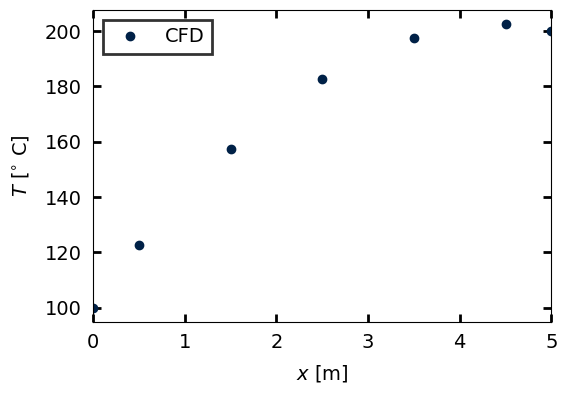

In [79]:


#if (plotOutput  =='true'):
# plt.rc('text', usetex=True)
 # plt.rc('font', family='serif')
	#plt.rcParams["figure.figsize"] = (6.2,4.2)
	#plt.rcParams['axes.linewidth'] = lineWidth
fig1 = plt.figure(1)
ax = fig1.add_subplot(111)
fig1.tight_layout(pad=boxPad)
ax.plot(xPlotting , temperaturePlotting, 'bo',
linewidth = lineWidth, label='CFD', color=darkBlue)
#ax.plot(xAnalytical, temperatureAnalytical, 'k--',
#linewidth = lineWidth, label = 'Analytical', color=darkBlue)
plt.xlabel(r'$x$ [m]', fontsize=fontSize, labelpad = labelPadX)
plt.ylabel(r'$T$ [$^{\circ}$ C]', fontsize=fontSize, labelpad = labelPadY)
plt.yticks(fontsize = fontSize)
plt.xticks(fontsize = fontSize)
plt.xlim([xFaces[0], xFaces[-1]])

leg = plt.legend(fontsize = fontSizeLegend, loc='best', fancybox=False,
		edgecolor = 'k')
leg.get_frame().set_linewidth(lineWidth)
ax.tick_params(which = 'both', direction='in', length=6,
		width=lineWidth, gridOn = False)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(pad=tickPad)
plt.show()